## Метод трапеций с приминением методики _Ричерсона_

    - реализовать численный подсчет интеграла методом трапеци с исполльзованием методики _Ричерсона_
    
**Входные данные:** ```U(x), a, b, N, R, S```, соответсвенно функция, подлежащая интегрированию, пределы интегрирования, количество слагаемых в сумме Дорбу, коэфициент сгущения и число сеток

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%pylab inline
plt.style.use('seaborn-dark')
plt.rc('font', size=15)

import warnings
warnings.filterwarnings("ignore")

Populating the interactive namespace from numpy and matplotlib


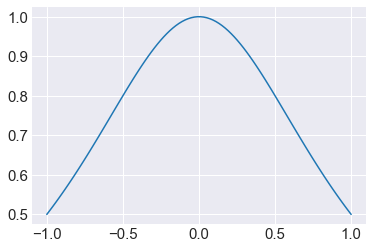

In [2]:
def func(x):
    return 1 / (1 + x**2)

fig = plt.figure()
X = np.linspace(-1, 1, 100)
Y = [func(x) for x in X]
plt.plot(X, Y)
plt.grid(lw=1)

In [8]:
def Integration(u, a, b, N):
    h = (b - a)/N
    x = linspace(a, b, N+1)
    integral = 0.
    for n in range(1, N+1):
        integral = integral + (u(x[n-1]) + u(x[n])) / 2*h 
    return integral

def PrintTriangular(mas, i):
    for m in range(len(mas)):
        
        for n in range(m + 1 - i):
            print('{0:7.4f}'.format(mas[m][n]), end=' ')
        
        print()

a = 0. 
b = 1.
N = 1
r = 2
p = 2
q = 2
S = 8

U = np.zeros((S,S))
R = np.zeros((S,S))
p_eff = np.zeros((S,S))

for s in range(S):
    U[s][0] = Integration(func, a, b, r**s*N)
    
for s in range(1, S):
    for n in range(s):
        R[s][n] = (U[s][n] - U[s-1][n]) / (r**(p + n*q) - 1)
        U[s][n + 1] = U[s][n] + R[s][n]
    
for s in range(2, S):
    for n in range(s - 1):
        p_eff[s][n] = log(abs(R[s-1][n]/R[s,n])) / log(r)
    
PrintTriangular(U,0)
PrintTriangular(R,1)
PrintTriangular(p_eff,2)


 0.7500 
 0.7750  0.7833 
 0.7828  0.7854  0.7855 
 0.7847  0.7854  0.7854  0.7854 
 0.7852  0.7854  0.7854  0.7854  0.7854 
 0.7854  0.7854  0.7854  0.7854  0.7854  0.7854 
 0.7854  0.7854  0.7854  0.7854  0.7854  0.7854  0.7854 
 0.7854  0.7854  0.7854  0.7854  0.7854  0.7854  0.7854  0.7854 

 0.0083 
 0.0026  0.0001 
 0.0007  0.0000 -0.0000 
 0.0002  0.0000 -0.0000  0.0000 
 0.0000  0.0000 -0.0000  0.0000 -0.0000 
 0.0000  0.0000 -0.0000 -0.0000 -0.0000 -0.0000 
 0.0000  0.0000 -0.0000 -0.0000 -0.0000  0.0000  0.0000 


 1.6815 
 1.9967  8.4302 
 1.9999  7.3263  8.5132 
 2.0000  5.9978  7.5906  8.8175 
 2.0000  5.9998  5.9972 15.9918  7.6029 
 2.0000  6.0023  5.9987  7.0362 16.0393  9.7146 


In [76]:
a = 0. 
b = 1.
N = 1
r = 2
p = 2
q = 2
S = 8
EPS = 15
U = np.zeros((S,S))
R = np.zeros((S,S))
p_eff = np.zeros((S,S))

s = 0
ans = None
while True:
    U[s][0] = Integration(func, a, b, r**s*N)
    
    for n in range(s):
        R[s][n] = (U[s][n] - U[s-1][n]) / (r**(p + n*q) - 1)
        p_eff[s][n] = log(abs(R[s-1][n]/R[s][n])) / log(r)
        if abs(R[s][n])  < 10**(-EPS):
            
            ans = (R[s][n], U[s][n], p_eff[s][n], p + n*q, s, n)
            exit = True
            break
        
        U[s][n + 1] = U[s][n] + R[s][n]
        
        
    s += 1
    
    if ans is not None: 
        break
    
print('Ответ: {0:12.10f}\nПогрешность: {1:12.10f}\nЭфективный порядок точности: {2:7.5f}\nТеоретический порядок точности: {3:7.5f}'.format(ans[1], ans[0], ans[2], ans[3]), end=' ')



Ответ: 0.7853981634
Погрешность: -0.0000000000
Эфективный порядок точности: 15.99183
Теоретический порядок точности: 8.00000 

In [74]:
PrintTriangular(U,0)
PrintTriangular(R,1)
PrintTriangular(p_eff,2)

 0.7500 
 0.7750  0.7833 
 0.7828  0.7854  0.7855 
 0.7847  0.7854  0.7854  0.7854 
 0.7852  0.7854  0.7854  0.7854  0.7854 
 0.7854  0.7854  0.7854  0.7854  0.7854  0.7854 
 0.7854  0.7854  0.7854  0.7854  0.0000  0.0000  0.0000 
 0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000 

 0.0083 
 0.0026  0.0001 
 0.0007  0.0000 -0.0000 
 0.0002  0.0000 -0.0000  0.0000 
 0.0000  0.0000 -0.0000  0.0000 -0.0000 
 0.0000  0.0000 -0.0000 -0.0000  0.0000  0.0000 
 0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000 


 1.6815 
 1.9967  8.4302 
 1.9999  7.3263  8.5132 
 2.0000  5.9978  7.5906  8.8175 
 2.0000  5.9998  5.9972 15.9918  0.0000 
 0.0000  0.0000  0.0000  0.0000  0.0000  0.0000 
